In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df_s = pd.read_csv('data/spatial-cdf-final.csv')
df_master = pd.read_csv('data/master-all-districts.csv')
df_master = df_master[df_master['District'].isin(pd.unique(df_s['District']))]
districts = pd.unique(df_s['District'])

In [3]:
sum(df_master['ASSET_2011'] == 1)

70

In [3]:
df_pdf = pd.read_csv('data/spatial-pdf-ma-test.csv')
df_cdf = pd.read_csv('data/spatial-cdf-ma-test.csv')
df_cdf['Temp'] = df_cdf['CHH_ADV']
df_cdf['CHH_ADV'] = df_cdf['CHH_RUD']
df_cdf['CHH_RUD'] = df_cdf['Temp']
del df_cdf['Temp']
df_cdf = df_cdf.merge(df_master.loc[:, ['District', 'State', 'Name', 'NAME']])

In [4]:
def illustrate_hypo1(attr):
    dists_2001 = df_master.loc[df_master[attr+'_2011'] > df_master[attr+'_2001'], 'District']
    print(len(dists_2001))
    print(df_master.loc[df_master['District'].isin(dists_2001), ['NAME', 'Name', attr+'_2001', attr+'_2011']])
    dists_2011 = df_master.loc[df_master[attr+'_2011'] == df_master[attr+'_2001'], 'District']
    print(len(dists_2011))
    df_2001 = df_cdf.loc[df_cdf['District'].isin(dists_2001), :]
    df_2011 = df_cdf.loc[df_cdf['District'].isin(dists_2011), :]
    df_2001.loc[:, 'Year'] = '+ change'
    df_2011.loc[:, 'Year'] = 'no change'
    df_comb = pd.concat([df_2001, df_2011])
#     df_comb['To'] = 100*df_comb['To']
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
    fig.subplots_adjust()
#     fig.suptitle('Comparing '+attr+' Spatial Variation of Districts that improved in '+attr+' from 2001 to 2011('+str(len(dists_2001))+') with districts that did not('+str(len(dists_2011))+')')
    ax = axes.ravel()
    
    sns.lineplot(x="To", y=attr+'_RUD', ax=ax[0], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
    ax[0].set(title=attr+' Level-1 spatial variation', ylabel='% villages labelled Level-1', xlabel='Distance Percentile')
    
    df_stat_test = stat_test_hypo1(attr, 'RUD')
    ax[1].plot(df_stat_test['dist_percentile'], df_stat_test['t_statistic'], '-')
    ax[1].set(title='t-statistic for Level-1 spatial variation', ylabel='t-statistic', xlabel='Distance Percentile')
    ax[2].plot(df_stat_test['dist_percentile'], df_stat_test['p_value'], '-', label='p-value')
    ax[2].plot(df_stat_test['dist_percentile'], 0.05*np.ones(len(df_stat_test['dist_percentile'])), '--', label='0.05')
    ax[2].set(yscale='log', title='p-value for Level-1 spatial variation', xlabel='Distance Percentile')
    ax[2].legend()

    sns.lineplot(x="To", y=attr+'_INT', ax=ax[3], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
    ax[3].set(title=attr+' Level-2 spatial variation', ylabel='% villages labelled Level-2', xlabel='Distance Percentile')

    df_stat_test = stat_test_hypo1(attr, 'INT')
    ax[4].plot(df_stat_test['dist_percentile'], df_stat_test['t_statistic'], '-')
    ax[4].set(title='t-statistic for Level-2 spatial variation', ylabel='t-statistic', xlabel='Distance Percentile')
    ax[5].plot(df_stat_test['dist_percentile'], df_stat_test['p_value'], '-', label='p-value')
    ax[5].plot(df_stat_test['dist_percentile'], 0.05*np.ones(len(df_stat_test['dist_percentile'])), '--', label='0.05')
    ax[5].set(yscale='log', title='p-value for Level-2 spatial variation', xlabel='Distance Percentile')    
    ax[5].legend()
    
    sns.lineplot(x="To", y=attr+'_ADV', ax=ax[6], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
    ax[6].set(title=attr+' Level-3 spatial variation', ylabel='% villages labelled Level-3', xlabel='Distance Percentile')

    df_stat_test = stat_test_hypo1(attr, 'ADV')
    ax[7].plot(df_stat_test['dist_percentile'], df_stat_test['t_statistic'], '-')
    ax[7].set(title='t-statistic for Level-3 spatial variation', ylabel='t-statistic', xlabel='Distance Percentile')
    ax[8].plot(df_stat_test['dist_percentile'], df_stat_test['p_value'], '-', label='p-value')
    ax[8].plot(df_stat_test['dist_percentile'], 0.05*np.ones(len(df_stat_test['dist_percentile'])), '--', label='0.05')
    ax[8].set(yscale='log', title='p-value for Level-3 spatial variation', xlabel='Distance Percentile')
    ax[8].legend()
    
    if not os.path.exists('new-plots/'):
        os.makedirs('new-plots/')
#     plt.savefig('new-plots/'+attr.lower()+'-hypo1-with-p-value.png', bbox_inches='tight')
    plt.savefig('new-plots/'+attr.lower()+'-hypo1.png', bbox_inches='tight')
    plt.show()

In [7]:
def illustrate_hypo2(attr, n):
    dists_2001 = df_master.loc[np.logical_and(df_master[attr+'_2011'] == n, df_master[attr+'_2001'] == n), 'District']
    print(len(dists_2001))
    dists_2011 = df_master.loc[np.logical_and(df_master[attr+'_2011'] == n, df_master[attr+'_2001'] != n), 'District']
    print(len(dists_2011))
    print(df_master.loc[df_master['District'].isin(dists_2001), ['NAME', 'Name', attr+'_2001', attr+'_2011']])
    print(sum(np.logical_and(df_master['District'].isin(dists_2001), df_master['Name'] == 'GUJARAT')))
    print(sum(np.logical_and(df_master['District'].isin(dists_2001), df_master['Name'] == 'MAHARASHTRA')))
    print(df_master.loc[df_master['District'].isin(dists_2011), ['NAME', 'Name', attr+'_2001', attr+'_2011']])
    print(pd.unique(df_cdf.loc[df_cdf['District'].isin(dists_2011), 'NAME']))
    df_2001 = df_cdf.loc[df_cdf['District'].isin(dists_2001), :]
    df_2011 = df_cdf.loc[df_cdf['District'].isin(dists_2011), :]
    df_2001.loc[:, 'Year'] = '2001'
    df_2011.loc[:, 'Year'] = '2011'
    df_comb = pd.concat([df_2001, df_2011])
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
    fig.subplots_adjust()
#     fig.suptitle('Comparing '+attr+' Spatial Variation of Districts that reached \n Level-'+str(n)+' in 2001('+str(len(dists_2001))+') with Districts that reached Level-'+str(n)+' in 2011('+str(len(dists_2011))+')')
    ax = axes.ravel()
    
    sns.lineplot(x="To", y=attr+'_RUD', ax=ax[0], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
    ax[0].set(title=attr+' Level-1 spatial variation', ylabel='% villages labelled Level-1', xlabel='Distance Percentile')
    
    df_stat_test = stat_test_hypo2(attr, n, 'RUD')
    ax[1].plot(df_stat_test['dist_percentile'], df_stat_test['t_statistic'], '-')
    ax[1].set(title='t-statistic for Level-1 spatial variation', ylabel='t-statistic', xlabel='Distance Percentile')
    ax[2].plot(df_stat_test['dist_percentile'], df_stat_test['p_value'], '-', label='p-value')
    ax[2].plot(df_stat_test['dist_percentile'], 0.05*np.ones(len(df_stat_test['dist_percentile'])), '--', label='0.05')
    ax[2].set(yscale='log', title='p-value for Level-1 spatial variation', xlabel='Distance Percentile')
    ax[2].legend()

    sns.lineplot(x="To", y=attr+'_INT', ax=ax[3], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
    ax[3].set(title=attr+' Level-2 spatial variation', ylabel='% villages labelled Level-2', xlabel='Distance Percentile')

    df_stat_test = stat_test_hypo2(attr, n, 'INT')
    ax[4].plot(df_stat_test['dist_percentile'], df_stat_test['t_statistic'], '-')
    ax[4].set(title='t-statistic for Level-2 spatial variation', ylabel='t-statistic', xlabel='Distance Percentile')
    ax[5].plot(df_stat_test['dist_percentile'], df_stat_test['p_value'], '-', label='p-value')
    ax[5].plot(df_stat_test['dist_percentile'], 0.05*np.ones(len(df_stat_test['dist_percentile'])), '--', label='0.05')
    ax[5].set(yscale='log', title='p-value for Level-2 spatial variation', xlabel='Distance Percentile')    
    ax[5].legend()
    
    sns.lineplot(x="To", y=attr+'_ADV', ax=ax[6], hue='Year', palette=sns.color_palette("hls", 2), legend='full', data=df_comb)
    ax[6].set(title=attr+' Level-3 spatial variation', ylabel='% villages labelled Level-3', xlabel='Distance Percentile')

    df_stat_test = stat_test_hypo2(attr, n, 'ADV')
    ax[7].plot(df_stat_test['dist_percentile'], df_stat_test['t_statistic'], '-')
    ax[7].set(title='t-statistic for Level-3 spatial variation', ylabel='t-statistic', xlabel='Distance Percentile')
    ax[8].plot(df_stat_test['dist_percentile'], df_stat_test['p_value'], '-', label='p-value')
    ax[8].plot(df_stat_test['dist_percentile'], 0.05*np.ones(len(df_stat_test['dist_percentile'])), '--', label='0.05')
    ax[8].set(yscale='log', title='p-value for Level-3 spatial variation', xlabel='Distance Percentile')
    ax[8].legend()
    
    if not os.path.exists('new-plots/'):
        os.makedirs('new-plots/')
    plt.savefig('new-plots/'+attr.lower()+'-'+str(n)+'-hypo2.png', bbox_inches='tight')
    plt.show()

In [8]:
def stat_test_hypo2(attr, n, lvl):
    df_cdf['To'] = pd.Series(list(map(lambda x : round(x, 3), df_cdf['To'])))
    df_cdf['Mid'] = pd.Series(list(map(lambda x : round(x, 3), df_cdf['Mid'])))
    dists_2001 = df_master.loc[np.logical_and(df_master[attr+'_2011'] == n, df_master[attr+'_2001'] == n), 'District']
    print(len(dists_2001))
    dists_2011 = df_master.loc[np.logical_and(df_master[attr+'_2011'] == n, df_master[attr+'_2001'] != n), 'District']
    print(len(dists_2011))
    df_2001 = df_cdf.loc[df_cdf['District'].isin(dists_2001), :]
    df_2011 = df_cdf.loc[df_cdf['District'].isin(dists_2011), :]
    df_2001.loc[:, 'Year'] = '2001'
    df_2011.loc[:, 'Year'] = '2011'

    to_ind = pd.unique(df_2001['To'])

    group_2001 = df_2001.groupby('To')
    group_2011 = df_2011.groupby('To')
    dict_2001 = {}
    for i, j in group_2001:
        dict_2001[i] = list(j.loc[:, attr+'_'+lvl])

    dict_2011 = {}
    for i, j in group_2011:
        dict_2011[i] = list(j.loc[:, attr+'_'+lvl])
    import collections
    import scipy
    dict_2001 = collections.OrderedDict(sorted(dict_2001.items()))
    dict_2011 = collections.OrderedDict(sorted(dict_2011.items()))

    df_stat_test = pd.DataFrame(columns=['dist_percentile', 't_statistic', 'p_value'])
    j = 0
    for i in dict_2001.keys():
        x = scipy.stats.ttest_ind(dict_2001[i], dict_2011[i], equal_var=False)
#         print(x[0])
        df_stat_test.loc[j, 'dist_percentile'] = i
        df_stat_test.loc[j, 't_statistic'] = x[0]
        df_stat_test.loc[j, 'p_value'] = x[1]
        j += 1
        
#         df_stat_test.to_csv('new-plots/'+attr.lower()+'-dist-lbl-'+str(n)+'-vil-lbl-'+lvl.lower()+'.csv')
    return df_stat_test

In [9]:
def stat_test_hypo1(attr, lvl):
    df_cdf['To'] = pd.Series(list(map(lambda x : round(x, 3), df_cdf['To'])))
    df_cdf['Mid'] = pd.Series(list(map(lambda x : round(x, 3), df_cdf['Mid'])))
    dists_2001 = df_master.loc[df_master[attr+'_2011'] > df_master[attr+'_2001'], 'District']
    print(len(dists_2001))
    dists_2011 = df_master.loc[df_master[attr+'_2011'] == df_master[attr+'_2001'], 'District']
    print(len(dists_2011))
    df_2001 = df_cdf.loc[df_cdf['District'].isin(dists_2001), :]
    df_2011 = df_cdf.loc[df_cdf['District'].isin(dists_2011), :]
    df_2001.loc[:, 'Year'] = '2001'
    df_2011.loc[:, 'Year'] = '2011'

    to_ind = pd.unique(df_2001['To'])
#     print(to_ind)

    group_2001 = df_2001.groupby('To')
    group_2011 = df_2011.groupby('To')
    dict_2001 = {}
    for i, j in group_2001:
        dict_2001[i] = list(j.loc[:, attr+'_'+lvl])

    dict_2011 = {}
    for i, j in group_2011:
        dict_2011[i] = list(j.loc[:, attr+'_'+lvl])
    import collections
    import scipy
    dict_2001 = collections.OrderedDict(sorted(dict_2001.items()))
    dict_2011 = collections.OrderedDict(sorted(dict_2011.items()))


    df_stat_test = pd.DataFrame(columns=['dist_percentile', 't_statistic', 'p_value'])
    j = 0
    for i in dict_2001.keys():
        x = scipy.stats.ttest_ind(dict_2001[i], dict_2011[i], equal_var=False)
#         print(x[0])
        df_stat_test.loc[j, 'dist_percentile'] = i
        df_stat_test.loc[j, 't_statistic'] = x[0]
        df_stat_test.loc[j, 'p_value'] = x[1]
        j += 1
        
#         df_stat_test.to_csv('new-plots/'+attr.lower()+'-dist-lbl-'+str(n)+'-vil-lbl-'+lvl.lower()+'.csv')
    return df_stat_test

10
42
                   NAME         Name  CHH_2001  CHH_2011
433           Ahmadabad      GUJARAT         3         3
435              Rajkot      GUJARAT         3         3
437           Porbandar      GUJARAT         3         3
474               Thane  MAHARASHTRA         3         3
478             Raigarh  MAHARASHTRA         3         3
544              Kannur       KERALA         3         3
548            Palakkad       KERALA         3         3
552            Kottayam       KERALA         3         3
555              Kollam       KERALA         3         3
556  Thiruvananthapuram       KERALA         3         3
3
2
                 NAME         Name  CHH_2001  CHH_2011
427           Kachchh      GUJARAT         2         3
429             Patan      GUJARAT         2         3
430          Mahesana      GUJARAT         2         3
432       Gandhinagar      GUJARAT         2         3
434     Surendranagar      GUJARAT         2         3
436          Jamnagar      GUJARA

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


NameError: name 'stat_test_hypo2' is not defined

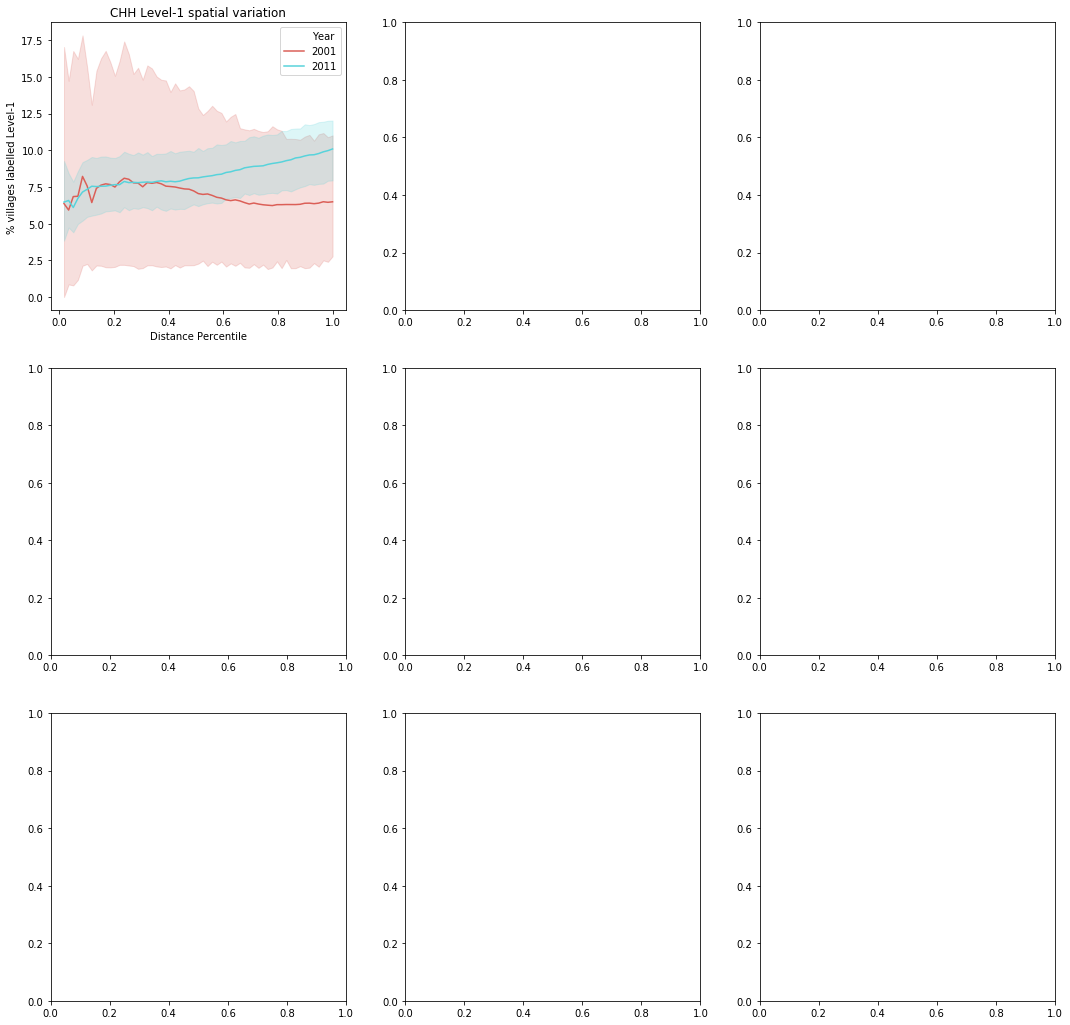

In [8]:
# illustrate_hypo1('FC')
# illustrate_hypo1('BF')
# illustrate_hypo1('MSW')
# illustrate_hypo1('MSL')
# illustrate_hypo1('CHH')
# illustrate_hypo2('MSL', 2)
# illustrate_hypo2('MSL', 3)
# illustrate_hypo2('MSW', 2)
# illustrate_hypo2('MSW', 3)
# illustrate_hypo2('CHH', 2)
illustrate_hypo2('CHH', 3)
# illustrate_hypo2('BF', 2)
# illustrate_hypo2('BF', 3)
# illustrate_hypo2('FC', 2)
# illustrate_hypo2('FC', 3)

In [71]:
df_master[df_master['BF_2011'] == 3]

,STATE,Name,NAME,District,No_HH,TOT_P,ELG_POP,LIT,F_EMP,F_EMP_Female,...,F_marg_2011_L,Ind_2011,Ind_2001,Ind_change,LIT_2001,LIT_2011,LIT_Change,Formal_EMP_2001,Formal emp 2011,Formal emp change
214,10,BIHAR,Patna,230,726364,4718592,3899598,62.916767,4.242078,7.523890,...,1,2,2,0,1,2,1,2,2,0
427,24,GUJARAT,Kachchh,468,320588,1583225,1328777,59.790544,6.529237,11.295671,...,3,2,2,0,1,2,1,2,3,1
430,24,GUJARAT,Mahesana,471,364447,1837892,1579753,75.215809,12.073470,21.574685,...,3,2,2,0,2,3,1,1,3,1
432,24,GUJARAT,Gandhinagar,473,269440,1334455,1148759,76.589955,10.743855,19.391914,...,2,2,2,0,2,3,1,3,3,0
433,24,GUJARAT,Ahmadabad,474,1150588,5816519,5046853,79.497857,4.691478,8.635127,...,2,4,4,0,3,3,0,1,3,1
435,24,GUJARAT,Rajkot,476,597990,3169881,2742697,74.158611,7.171919,12.874453,...,3,4,4,0,2,3,1,1,3,1
436,24,GUJARAT,Jamnagar,477,350105,1904278,1630010,66.484009,6.934129,12.246169,...,3,2,2,0,1,2,1,3,3,0
437,24,GUJARAT,Porbandar,478,105893,536835,460736,68.623246,6.288200,11.099788,...,3,2,2,0,2,2,0,3,3,0
438,24,GUJARAT,Junagadh,479,432884,2448173,2078482,67.783989,6.821084,11.855852,...,3,2,2,0,1,2,1,1,2,1
439,24,GUJARAT,Amreli,480,248677,1393918,1195261,66.092510,8.713996,15.044235,...,3,1,2,-1,1,2,1,3,2,-1


In [86]:
def state_illustrate(attr):
    df_plot = df_cdf.loc[df_cdf['District'].isin(df_master.loc[df_master[attr+'_2011'] == 3, 'District']), :]
    plot = sns.lineplot(x="To", y=attr+'_RUD', hue='Name', palette=sns.color_palette("hls", len(pd.unique(df_plot['Name']))), legend='full', data=df_plot)
    plt.show()
    plot = sns.lineplot(x="To", y=attr+'_INT', hue='Name', palette=sns.color_palette("hls", len(pd.unique(df_plot['Name']))), legend='full', data=df_plot)
    plt.show()
    plot = sns.lineplot(x="To", y=attr+'_ADV', hue='Name', palette=sns.color_palette("hls", len(pd.unique(df_plot['Name']))), legend='full', data=df_plot)
    plt.show()

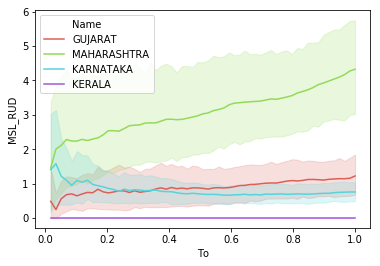

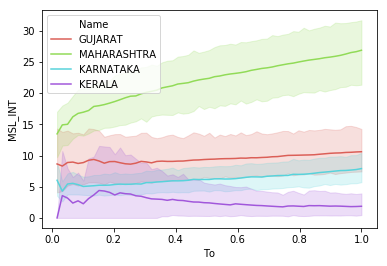

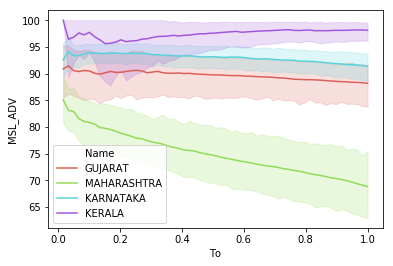

In [93]:
state_illustrate('MSL')

15
149


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


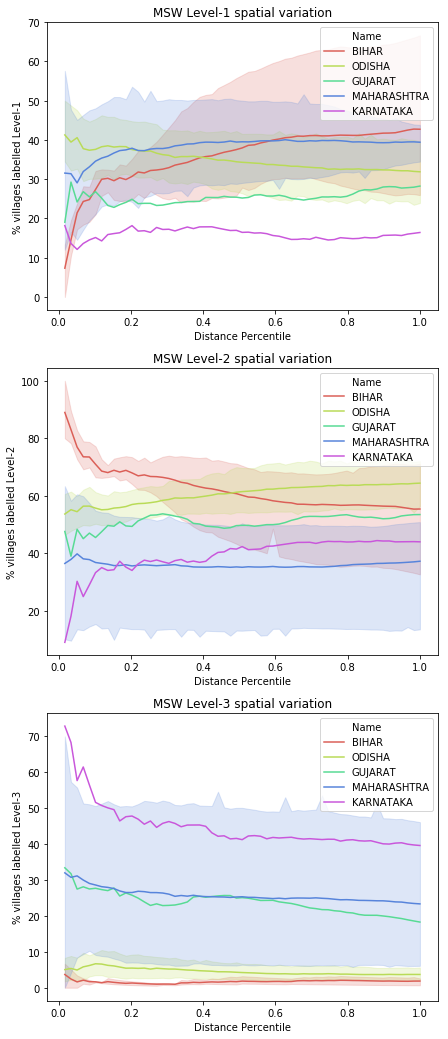

In [52]:
attr = 'MSW'
dists_2001 = df_master.loc[df_master[attr+'_2011'] > df_master[attr+'_2001'], 'District']
print(len(dists_2001))
dists_2011 = df_master.loc[df_master[attr+'_2011'] == df_master[attr+'_2001'], 'District']
print(len(dists_2011))
df_2001 = df_cdf.loc[df_cdf['District'].isin(dists_2001), :]
df_2011 = df_cdf.loc[df_cdf['District'].isin(dists_2011), :]
df_2001.loc[:, 'Year'] = '+ change'
df_2011.loc[:, 'Year'] = 'no change'
df_comb = pd.concat([df_2001, df_2011])

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 18))
ax = axes.ravel()

sns.lineplot(x="To", y=attr+'_RUD', ax=ax[0], hue='Name', palette=sns.color_palette("hls", len(pd.unique(df_2001['Name']))), legend='full', data=df_2001)
ax[0].set(title=attr+' Level-1 spatial variation', ylabel='% villages labelled Level-1', xlabel='Distance Percentile')

sns.lineplot(x="To", y=attr+'_INT', ax=ax[1], hue='Name', palette=sns.color_palette("hls", len(pd.unique(df_2001['Name']))), legend='full', data=df_2001)
ax[1].set(title=attr+' Level-2 spatial variation', ylabel='% villages labelled Level-2', xlabel='Distance Percentile')

sns.lineplot(x="To", y=attr+'_ADV', ax=ax[2], hue='Name', palette=sns.color_palette("hls", len(pd.unique(df_2001['Name']))), legend='full', data=df_2001)
ax[2].set(title=attr+' Level-3 spatial variation', ylabel='% villages labelled Level-3', xlabel='Distance Percentile')

plt.show()
